# Tarea 1: Resortes acoplados
*Jesús Eduardo Hermosilla Díaz*

## Dos masas acopladas

Dado un sistema de dos masas acopladas, el hamiltoniano que describe al sistema es: \\
\begin{align}
H &=\frac{p_{1}^{2}}{2 m}+\frac{p_{2}^{2}}{2 m}+\frac{1}{2} k_1x_1^{2}+\frac{1}{2} k_2(x_{2}-x_{1})^{2}+\frac{1}{2} k_3x_2^{2} \\
q_{a1} &= \dot{q_{0}} =\frac{1}{m_1}p_{1}\\
q_{b1} &= \dot{q_0} =\frac{1}{m_2}p_2 \\
q_{a0} &= -k_1x_1 + k_2(x_2 - x_1)  = -x_1(k_1 +k_2) +k_2 x_2\\
q_{b0} &= -k_2(x_2 -x_1) - k_3x_2  = k_2x_1-x_2(k_2 +k_3)\\
\end{align} \\
$\vec{q}=\left[\begin{array}{l}{x} \\ {u}\end{array}\right]=\left[\begin{array}{l}{q_{0}} \\ {q_{1}}\end{array}\right]
$

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [0]:
'''Constantes '''
k1 = 1.0
k2= 1.0
k3 = 1.0
m1= 1.0
m2= 1.0

In [0]:
def Q_Dot(x): 
  x1, x2, p1, p2 = x[0], x[1], x[2], x[3]
  
  x1_dot = p1/m1
  x2_dot = p2/m2
  p1_dot = k2*(x2-x1)-k1*x1
  p2_dot = -k2*(x2-x1)-k3*x2

  return np.asarray([x1_dot,x2_dot,p1_dot,p2_dot])

In [0]:
def paso_euler(f, t_n, q_n, dt): 
  q_dot = f(t_n, q_n)
  q_n_mas_1 = q_n + dt*q_dot
  return q_n_mas_1

In [0]:
def integral(f, t, q_0, dt): 
  t_0, t_f = t 
  n = int((t_f-t_0)/dt)  
  d = len(q_0)

  q_tray= np.zeros((n+1, d))
  E = np.zeros(n+1)
  t = np.linspace(t_0, t_f, n+1)
  
  q_tray[0,:] = q_0
  E[0] = (0.5/m1)*(q_tray[0,2]**2)+(0.5/m2)*(q_tray[0,3]**2)+0.5*k1*(q_tray[0,0]**2)+0.5*k3*(q_tray[0,1]**2)+0.5*k2*((q_tray[0,1]-q_tray[0,0])**2)
  
  for i in range(n):

    q_tray[i+1,:] = paso_euler(f, t[i], q_tray[i,:], dt)
  
    E[i+1] = (0.5/m1)*(q_tray[i,2]**2)+(0.5/m2)*(q_tray[i,3]**2)+0.5*k1*(q_tray[i,0]**2)+0.5*k3*(q_tray[i,1]**2)+0.5*k2*((q_tray[i,1]-q_tray[i,0])**2)
  
  return t, q_tray, E


In [0]:
def Q_Dot_t(t, x): 
  return Q_Dot(x)

### a) Tiempo de ejecución para diferentes condiciones iniciales

In [645]:
start = timer()
t1, q1_tray, E1 = integral(Q_Dot_t, [0,100], [0.5, 1.5, 0.7, 0.], 0.00005)
end = timer()
print("Tiempo de ejecución:", end - start, "segundos"  )

Tiempo de ejecución: 24.77831992600113 segundos


In [629]:
start = timer()
t2, q2_tray, E2 = integrador_simpleE(campo_t, [0,100], [1.5, 3.5, 0., 0.], 0.00005)
end = timer()
print("Tiempo de ejecución:", end - start, "segundos"  )

Tiempo de ejecución: 24.940200195997022 segundos


In [630]:
start = timer()
t3, q3_tray, E3 = integrador_simpleE(campo_t, [0,100], [2.0, 1.5, 0.2, 1.3], 0.00005)
end = timer()
print("Tiempo de ejecución:", end - start, "segundos"  )

Tiempo de ejecución: 24.886848590002046 segundos


### b) Mostrar que la energia se conserva

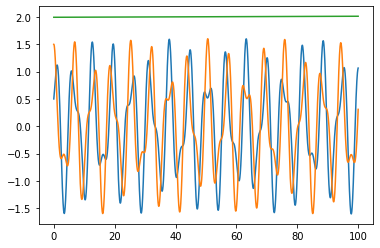

In [631]:
plt.plot(t1, qe1_tray[:,0])
plt.plot(t1, qe1_tray[:,1])
plt.plot(t1, E1)

### b) Energía total del sistema

## c) N masas acopladas

El hamiltoniano del sistema es:
\begin{align}
\mathcal{H} &=\sum_{i=1}^{3} \frac{m v_{i}^{2}}{2}+\sum_{i=0}^{3} \frac{\kappa}{2}\left(u_{i+1}-u_{i}\right)^{2} \\
\dot{u}_{i}& = \frac{\partial \mathcal{H}}{\partial p_{i}}=\frac{p_{i}}{m}\\
\dot{p}_{i}& =-\frac{\partial \mathcal{H}}{\partial u_{i}}=\kappa( u_{i+1}-2 u_{i}+u_{i-1})
\end{align}

In [646]:
'''Constantes '''
N = int(input(" Numero de masas acopladas: "))
k = float(input(" Constante eláástica de los resortes: "))
m = float (input("Masa de los bloques: "))

 Numero de masas acopladas: 6
 Constante eláástica de los resortes: 1
Masa de los bloques: 1


 Suponiendo que los extremos están fijos los desplazamientos 
 $u_{0}$ y $u_{N+1}$ son cero.

In [0]:
def U_Dot(t,U): 
  ''' Vector U'''
  U[0] = 0
  U[N+1] = 0
  U[N+2] = 0
  U[2*N+3] = 0
  u_dot=np.zeros(2*N+4) 
  for i in range(1,N+1):
    u_dot[i] = U[N+2+i]/m
    u_dot[N+2+i] = k*(U[i+1]-2*U[i]+U[i-1])
  return u_dot

In [0]:
def paso_euler(f, t_n, u_n, dt):
  u_dot = f(t_n, u_n)
  u_n_mas_1 = u_n + dt*u_dot
  return u_n_mas_1

In [0]:
def campo(f, t, u_0, dt):
  t_0, t_f = t 
  n = int((t_f-t_0)/dt)  
  d = len(u_0)
  
  u_tray= np.zeros((n+1, d))
  t = np.linspace(t_0, t_f, n+1)
  u_tray[0,:] = u_0
  
  for i in range(n):

    u_tray[i+1,:] = paso_euler(f, t[i], u_tray[i,:], dt)

  return t, u_tray

In [0]:
u0= np.random.rand(2*N+4)

In [665]:
start = timer()
t, u_tray=campo(U_Dot, [0,100], u0, 0.0005)
end = timer()
print("Tiempo de ejecución:", end - start, "segundos"  )

Tiempo de ejecución: 3.096363360993564 segundos


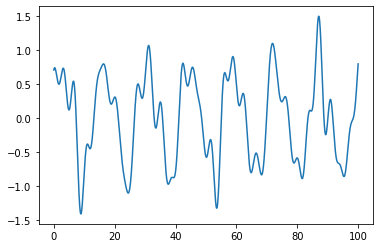

In [666]:
plt.plot(t, u_tray[:,1])